In [1]:
# 加载第三方库
import numpy as np
import pandas as pd
import textwrap

from pyBibX.base import pbx_probe
from prettytable import PrettyTable

关于导入后报错：

    ImportError: Numba needs NumPy 1.25 or less

In [2]:
# 需要将numpy版本指定到1.25版本或者更低
# !pip install numpy==1.25

## 重新启动后再次运行下面代码

（1）第三方库导入

In [3]:
import numpy as np
import pandas as pd
import textwrap

from pyBibX.base import pbx_probe
from prettytable import PrettyTable

（2）加载数据bib文件

In [4]:
# 参数设置: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False

file_name = '../assets/bibs/scopus.bib'
database  = 'scopus'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 261 Documents were Found ( 263 Documents and 2 Duplicates )

Article = 179
Article in Press = 1
Book Chapter = 12
Conference Paper = 64
Conference Review = 3
Review = 2


（3）探索式数据分析EDA

In [5]:
report  = bibfile.eda_bib()
report

Main Information    Results
0                                Timespan  1998-2022
1               Total Number of Countries         34
2            Total Number of Institutions        313
3                 Total Number of Sources        156
4              Total Number of References       8536
5               Total Number of Languages          6
6                  --croatian (# of docs)          1
7                   --english (# of docs)        252
8       --english; lithuanian (# of docs)          1
9                    --french (# of docs)          2
10                   --polish (# of docs)          1
11               --portuguese (# of docs)          4
12                                   -//-       -//-
13              Total Number of Documents        261
14                              --Article        179
15                     --Article in Press          1
16                         --Book Chapter         12
17                     --Conference Paper         64
18                    --Conference Review          3
19                               --Review          2
20           Average Documents per Author        1.6
21      Average Documents per Institution       2.61
22           Average Documents per Source       1.67
23             Average Documents per Year      10.44
24                                   -//-       -//-
25                Total Number of Authors        499
26       Total Number of Authors Keywords        687
27  Total Number of Authors Keywords Plus       1359
28        Total Single-Authored Documents         14
29         Total Multi-Authored Documents        247
30            Average Collaboration Index       3.06
31                            Max H-Index         14
32                                   -//-       -//-
33              Total Number of Citations       5863
34           Average Citations per Author      11.75
35      Average Citations per Institution      18.73
36         Average Citations per Document      22.46
37           Average Citations per Source      37.57
38                                   -//-       -//-

（4）检查文章的IDs

In [6]:
bibfile.table_id_doc

ID                                           Document
0      0  Figueira, J.R. and Greco, S. and Roy, B. (2022...
1      1  de Araújo, M.C.B. and Alencar, L.H. and de Mir...
2      2  Viana, F.F.C.L. and Alencar, M.H. and Ferreira...
3      3  Ahmed, U. and Carpitella, S. and Certa, A. (20...
4      4  Rocha, A. and Costa, A.S. and Figueira, J.R. a...
..   ...                                                ...
256  256  Mousseau, V. and Slowinski, R. and Zielniewicz...
257  257  Dias, L.C. and Clímaco, J.N. (2000). ELECTRE T...
258  258  Raju, K.S. and Duckstein, L. and Arondel, C. (...
259  259  Dias, L.C. and Clímaco, J.N. (1999). On comput...
260  260  Mousseau, V. and Slowinski, R. (1998). Inferri...

[261 rows x 2 columns]

In [7]:
from pandasgui import show
show(bibfile.table_id_doc)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


<img src='gui.png'>

(5) 检查每种文献类型包含的IDs

In [8]:
bibfile.id_doc_types()

Document Types                                                IDs
0            Article  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1   Article in Press                                               [92]
2       Book Chapter  [58, 84, 108, 129, 130, 131, 132, 133, 134, 16...
3   Conference Paper  [14, 18, 19, 22, 33, 36, 38, 42, 44, 60, 61, 6...
4  Conference Review                                     [81, 100, 206]
5             Review                                         [142, 174]

In [9]:
show(bibfile.id_doc_types())

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


<img src='IDs.png'>

(6)检查作者与IDs

In [10]:
bibfile.table_id_aut

ID            Author
0      a_0          abed, m.
1      a_1      abi-zeid, i.
2      a_2         achki, s.
3      a_3       addi, a.-m.
4      a_4       adolphe, l.
..     ...               ...
494  a_494    zopounidis, c.
495  a_495    özpeynirci, o.
496  a_496  özpeynirci, s.b.
497  a_497        öztürk, m.
498  a_498         şahin, m.

[499 rows x 2 columns]

In [11]:
bibfile.table_id_aut.groupby('Author').count().reset_index()
#全都是唯一作者

Author  ID
0            abed, m.   1
1        abi-zeid, i.   1
2           achki, s.   1
3         addi, a.-m.   1
4         adolphe, l.   1
..                ...  ..
494    zopounidis, c.   1
495    özpeynirci, o.   1
496  özpeynirci, s.b.   1
497        öztürk, m.   1
498         şahin, m.   1

[499 rows x 2 columns]

（7）检查文献来源与IDs

In [12]:
bibfile.table_id_jou

ID                                       Source
0      j_0                               eur j oper res
1      j_1                                        omega
2      j_2                     lect. notes comput. sci.
3      j_3  journal of multi-criteria decision analysis
4      j_4                       int. trans. oper. res.
..     ...                                          ...
151  j_151                           appl. math. model.
152  j_152                            adv. soft comput.
153  j_153               adv. sci., technol. eng. syst.
154  j_154                               adv. eng. inf.
155  j_155                                          4or

[156 rows x 2 columns]

In [13]:
bibfile.table_id_jou.groupby('Source').count().reset_index()
#全都是唯一期刊，类似数据库中的表格，没有重复

Source  ID
0                                                  4or   1
1                                       adv. eng. inf.   1
2                            adv. intell. soft comput.   1
3                            adv. intell. sys. comput.   1
4    adv. saf., reliab. risk manage. - proc. eur. s...   1
..                                                 ...  ..
151                          univers. access inf. soc.   1
152                                      waste manage.   1
153                                              water   1
154                              water resour. manage.   1
155                                water sci. technol.   1

[156 rows x 2 columns]

（8）检查机构和IDs

In [14]:
bibfile.table_id_uni

ID                                        Institution
0      i_0                                 domaine saint paul
1      i_1                          1235–cidade universitária
2      i_2             dept. of electrical eng. and computers
3      i_3    institute for systems engineering and computers
4      i_4  cemagref - groupe de recherche ouvrages hydrau...
..     ...                                                ...
308  i_308                                    lab. d'agronom.
309  i_309                       université de paris dauphine
310  i_310                      pomeranian medical university
311  i_311                 school of economics and management
312  i_312                              university of coimbra

[313 rows x 2 columns]

（9）检查国家和IDs

In [15]:
bibfile.table_id_ctr

ID         Country
0    c_0           Chile
1    c_1            Iran
2    c_2         Belgium
3    c_3          Brazil
4    c_4          Greece
5    c_5         Denmark
6    c_6           India
7    c_7          Serbia
8    c_8           Italy
9    c_9          Poland
10  c_10         Lebanon
11  c_11         Finland
12  c_12          Mexico
13  c_13    Saudi Arabia
14  c_14         Algeria
15  c_15         Tunisia
16  c_16          Turkey
17  c_17        Slovenia
18  c_18        Portugal
19  c_19         Czechia
20  c_20           China
21  c_21           Spain
22  c_22    Burkina Faso
23  c_23  United Kingdom
24  c_24          Canada
25  c_25         Morocco
26  c_26        Cameroon
27  c_27          UNKNOW
28  c_28     Netherlands
29  c_29         Croatia
30  c_30          France
31  c_31     Switzerland
32  c_32         Germany
33  c_33         Austria

（10）检查作者关键词与IDs


In [16]:
bibfile.table_id_kwa

ID                                         KWA
0      k_0                                 electre tri
1      k_1                  multiple criteria analysis
2      k_2                                     sorting
3      k_3                               electre tri-c
4      k_4                               multicriteria
..     ...                                         ...
682  k_682      aggregation/ disaggregation approaches
683  k_683                           activity branches
684  k_684  accreditation of qualifications and skills
685  k_685                      accounting information
686  k_686                                       68n99

[687 rows x 2 columns]

（11）关键词Plus与IDs

In [17]:
bibfile.table_id_kwp

ID                       KWP
0        p_0           decision making
1        p_1               electre tri
2        p_2  decision support systems
3        p_3                   electre
4        p_4    multicriteria analysis
...      ...                       ...
1354  p_1354       accuracy assessment
1355  p_1355             accreditation
1356  p_1356                  accident
1357  p_1357      absolute performance
1358  p_1358            abandoned mine

[1359 rows x 2 columns]

## 2 数据可视化

（1）词云图

`bibfile.word_cloud_plot()`可以从摘要、标题、作者关键词和关键词Plus四个字段进行绘制词云图

对应的是entry参数，可以指定的赋值为`'abs', 'title', 'kwa', or 'kwp'`

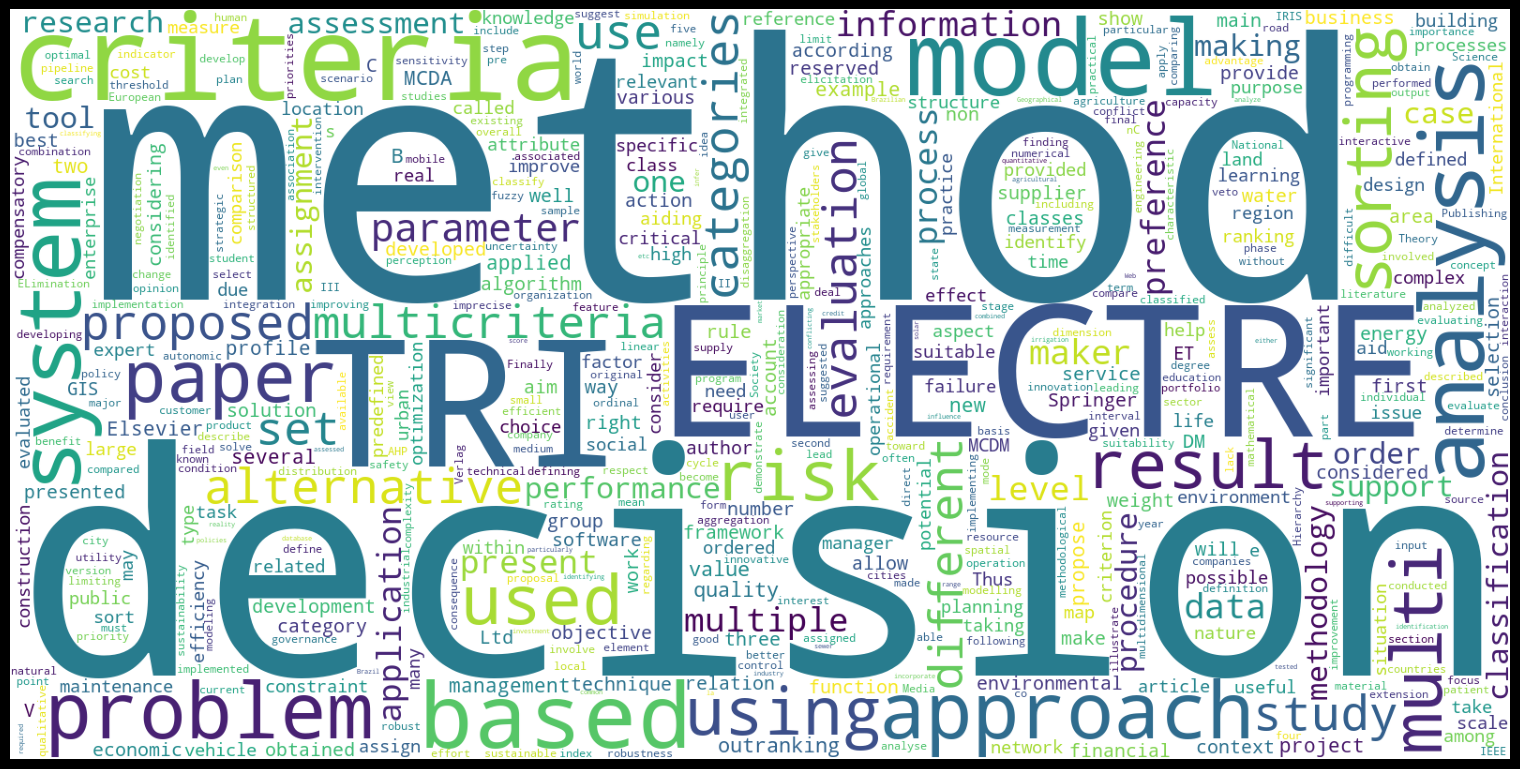

In [18]:
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

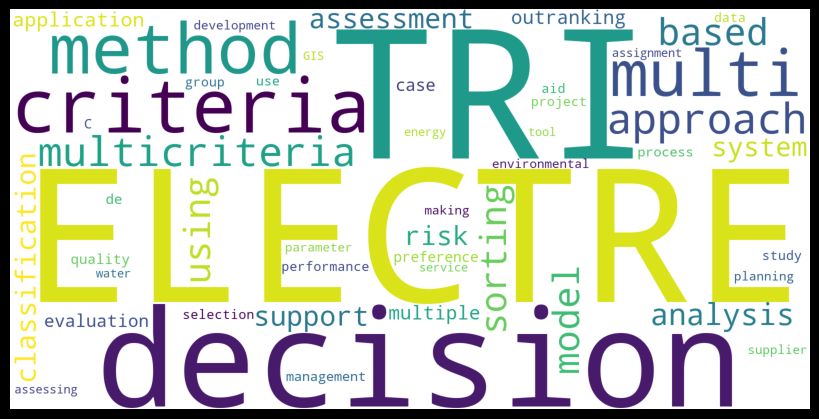

In [19]:
bibfile.word_cloud_plot(entry = 'title', size_x = 8, size_y = 6, wordsn = 50)

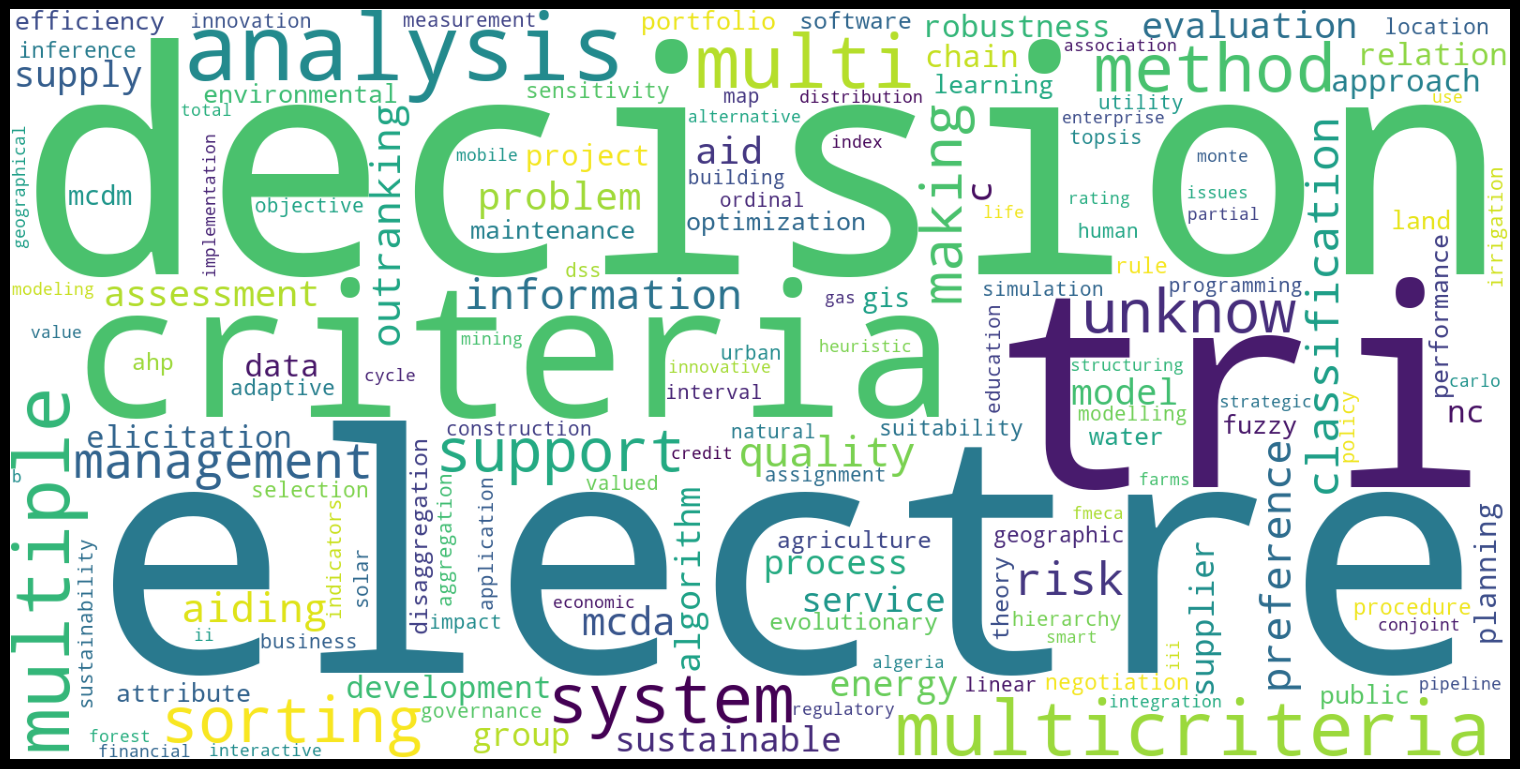

In [20]:
bibfile.word_cloud_plot(entry = 'kwa', size_x = 15, size_y = 10, wordsn = 150)

（2）词频表格

In [21]:
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+----------------+------------+
|      Word      | Importance |
+----------------+------------+
|    electre     |    1.0     |
|    decision    |   0.9295   |
|      tri       |   0.9038   |
|    criteria    |   0.6346   |
|    analysis    |   0.5641   |
|    multiple    |   0.3654   |
| multicriteria  |   0.3526   |
|     multi      |   0.3333   |
|     system     |   0.2821   |
|     method     |   0.2692   |
|    sorting     |   0.2372   |
|     unknow     |   0.2179   |
|    support     |   0.2179   |
|     making     |   0.1923   |
|   management   |   0.1795   |
|      risk      |   0.1538   |
| classification |   0.1474   |
|    quality     |   0.1282   |
|   preference   |   0.1282   |
|  information   |   0.1282   |
|     aiding     |   0.1154   |
|   outranking   |   0.1154   |
|      mcda      |   0.109    |
|    problem     |   0.1026   |
|      aid       |   0.0962   |
|   evaluation   |   0.0897   |
|   assessment   |   0.0897   |
|       c        |   0.0897   |
|     mo

In [22]:
bibfile.ask_gpt_wd

{'electre': 1.0,
 'decision': 0.9294871794871795,
 'tri': 0.9038461538461539,
 'criteria': 0.6346153846153846,
 'analysis': 0.5641025641025641,
 'multiple': 0.36538461538461536,
 'multicriteria': 0.3525641025641026,
 'multi': 0.3333333333333333,
 'system': 0.28205128205128205,
 'method': 0.2692307692307692,
 'sorting': 0.23717948717948717,
 'unknow': 0.21794871794871795,
 'support': 0.21794871794871795,
 'making': 0.19230769230769232,
 'management': 0.1794871794871795,
 'risk': 0.15384615384615385,
 'classification': 0.14743589743589744,
 'quality': 0.1282051282051282,
 'preference': 0.1282051282051282,
 'information': 0.1282051282051282,
 'aiding': 0.11538461538461539,
 'outranking': 0.11538461538461539,
 'mcda': 0.10897435897435898,
 'problem': 0.10256410256410256,
 'aid': 0.09615384615384616,
 'evaluation': 0.08974358974358974,
 'assessment': 0.08974358974358974,
 'c': 0.08974358974358974,
 'model': 0.08333333333333333,
 'supply': 0.08333333333333333,
 'energy': 0.08333333333333333,

In [23]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType


words = [(k,v) for k,v in bibfile.ask_gpt_wd.items()]
c = (
    WordCloud()
    .add("", words, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-shape-diamond"))
   
)
c.render_notebook()

In [24]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud
from pyecharts.globals import SymbolType


words = [(k,v) for k,v in bibfile.ask_gpt_wd.items()]
c = (
    WordCloud()
    .add("", words, word_size_range=[20, 100], shape=SymbolType.DIAMOND)
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-shape-diamond"))
   
)
c.render('pyecharts_wordcloud.pdf')

'D:\\Miniconda项目\\课题\\科学计量\\pybibx\\[2] Scopus\\pyecharts_wordcloud.pdf'

（3）N-Grams

In [25]:
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [26]:
bibfile.ask_gpt_ng

Word  Freq
0           decision support systems    60
1            multi criteria decision    48
2           decision making decision    24
3         multiple criteria decision    20
4         criteria decision analysis    19
5            making decision support    18
6            multi criteria analysis    16
7           criteria decision aiding    16
8     geographic information systems    16
9           criteria decision making    15
10        multiple criteria analysis    11
11     classification of information    11
12           decision support system    11
13        criteria multiple criteria    10
14  artificial intelligence decision    10

In [27]:
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 20)

In [28]:
bibfile.ask_gpt_ng

Word  Freq
0           decision support systems    60
1            multi criteria decision    48
2           decision making decision    24
3         multiple criteria decision    20
4         criteria decision analysis    19
5            making decision support    18
6            multi criteria analysis    16
7           criteria decision aiding    16
8     geographic information systems    16
9           criteria decision making    15
10        multiple criteria analysis    11
11     classification of information    11
12           decision support system    11
13        criteria multiple criteria    10
14  artificial intelligence decision    10
15                 electre tri multi    10
16          support systems decision     9
17                tri multi criteria     9
18            criteria decision aids     9
19         decision supports electre     8

(4)文献聚类

In [29]:
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [30]:
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_pr 

0          1    2
0    3.844940  14.215761  1.0
1    0.673165  11.180167  0.0
2    0.210069  10.085811  0.0
3    1.273995   9.118046  3.0
4    2.608781  10.479581  3.0
..        ...        ...  ...
256  3.261425  13.285435  1.0
257  2.198348  13.768296  1.0
258  1.920452   9.256334  3.0
259  2.235568  13.829961  1.0
260  2.777856  14.346270  1.0

[261 rows x 3 columns]

(5) 检查文献聚类

In [31]:
cluster      = 0
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

1, 2, 7, 16, 17, 21, 33, 36, 37, 43, 45, 49, 57, 65, 66, 68, 69, 72, 74, 77, 79, 89, 92, 94, 96, 102, 103, 112, 113, 114, 115, 123, 128, 130, 150, 175, 177, 180, 196, 205, 209, 215, 216, 239, 244, 251, 253


## 主题词演化

In [32]:
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'abs',
                            topn             = 10,
                            start            = 2010,
                            end              = 2021)

In [33]:
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2010: electre (9), tri (9), decision (8), method (8), based (5), paper (5), presented (4), model (4), application (4), process (4) 2011: electre (8),
method (8), tri (8), decision (6), model (6), categories (6), criteria (6), predefined (4), problems (4), results (4) 2012: electre (15), tri (15),
decision (13), method (12), criteria (11), based (9), multiple (8), problems (8), sorting (8), paper (8) 2013: tri (13), electre (13), method (11),
decision (10), criteria (7), paper (7), analysis (6), real (6), based (5), approach (5) 2014: electre (21), tri (21), method (19), criteria (18),
analysis (15), decision (15), paper (14), information (12), model (12), proposed (11) 2015: electre (17), tri (17), criteria (14), decision (13),
method (13), analysis (10), multi (9), based (8), information (8), approach (7) 2016: criteria (16), decision (15), tri (15), electre (15), method
(13), problem (11), multi (11), analysis (9), paper (9), approach (8) 2017: electre (16), tri (16), method (14), c

## 桑基图绘制

In [34]:
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

In [35]:
data_sk = bibfile.ask_gpt_sk
data_sk

Node From                             Node To  \
0                         mousseau, v.                              France   
1                           dias, l.c.                            Portugal   
2                       figueira, j.r.                            Portugal   
3                        antunes, c.h.                            Portugal   
4                          costa, h.g.                              Brazil   
5                     de almeida, a.t.                              Brazil   
6                               unknow                    UNKNOW_Countries   
7                           trojan, f.                              Brazil   
8                         oliveira, e.                            Portugal   
9                         bouyssou, d.                              France   
10                            Portugal                             ceg-ist   
11                              Brazil    federal university of pernambuco   
12                              France        laboratoire génie industriel   
13                    UNKNOW_Countries                 UNKNOW_Institutions   
14                            Portugal                faculty of economics   
15                            Portugal     polytechnic institute of leiria   
16                              Brazil     universidade federal fluminense   
17                              France             psl research university   
18                              France  pl. marechal de lattre de tassigny   
19                            Portugal          instituto superior técnico   
20                             ceg-ist                             english   
21                faculty of economics                             english   
22    federal university of pernambuco                             english   
23        laboratoire génie industriel                             english   
24                 UNKNOW_Institutions                             english   
25          instituto superior técnico                             english   
26     polytechnic institute of leiria                             english   
27     universidade federal fluminense                             english   
28             psl research university                             english   
29  pl. marechal de lattre de tassigny                             english   

    Connection Weigth  
0                  18  
1                  17  
2                  11  
3                  10  
4                   9  
5                   8  
6                   6  
7                   6  
8                   6  
9                   5  
10                 14  
11                  8  
12                  7  
13                  6  
14                  6  
15                  5  
16                  5  
17                  4  
18                  3  
19                  3  
20                 17  
21                 13  
22                  8  
23                  8  
24                  7  
25                  6  
26                  6  
27                  5  
28                  4  
29                  4

## 树图可视化

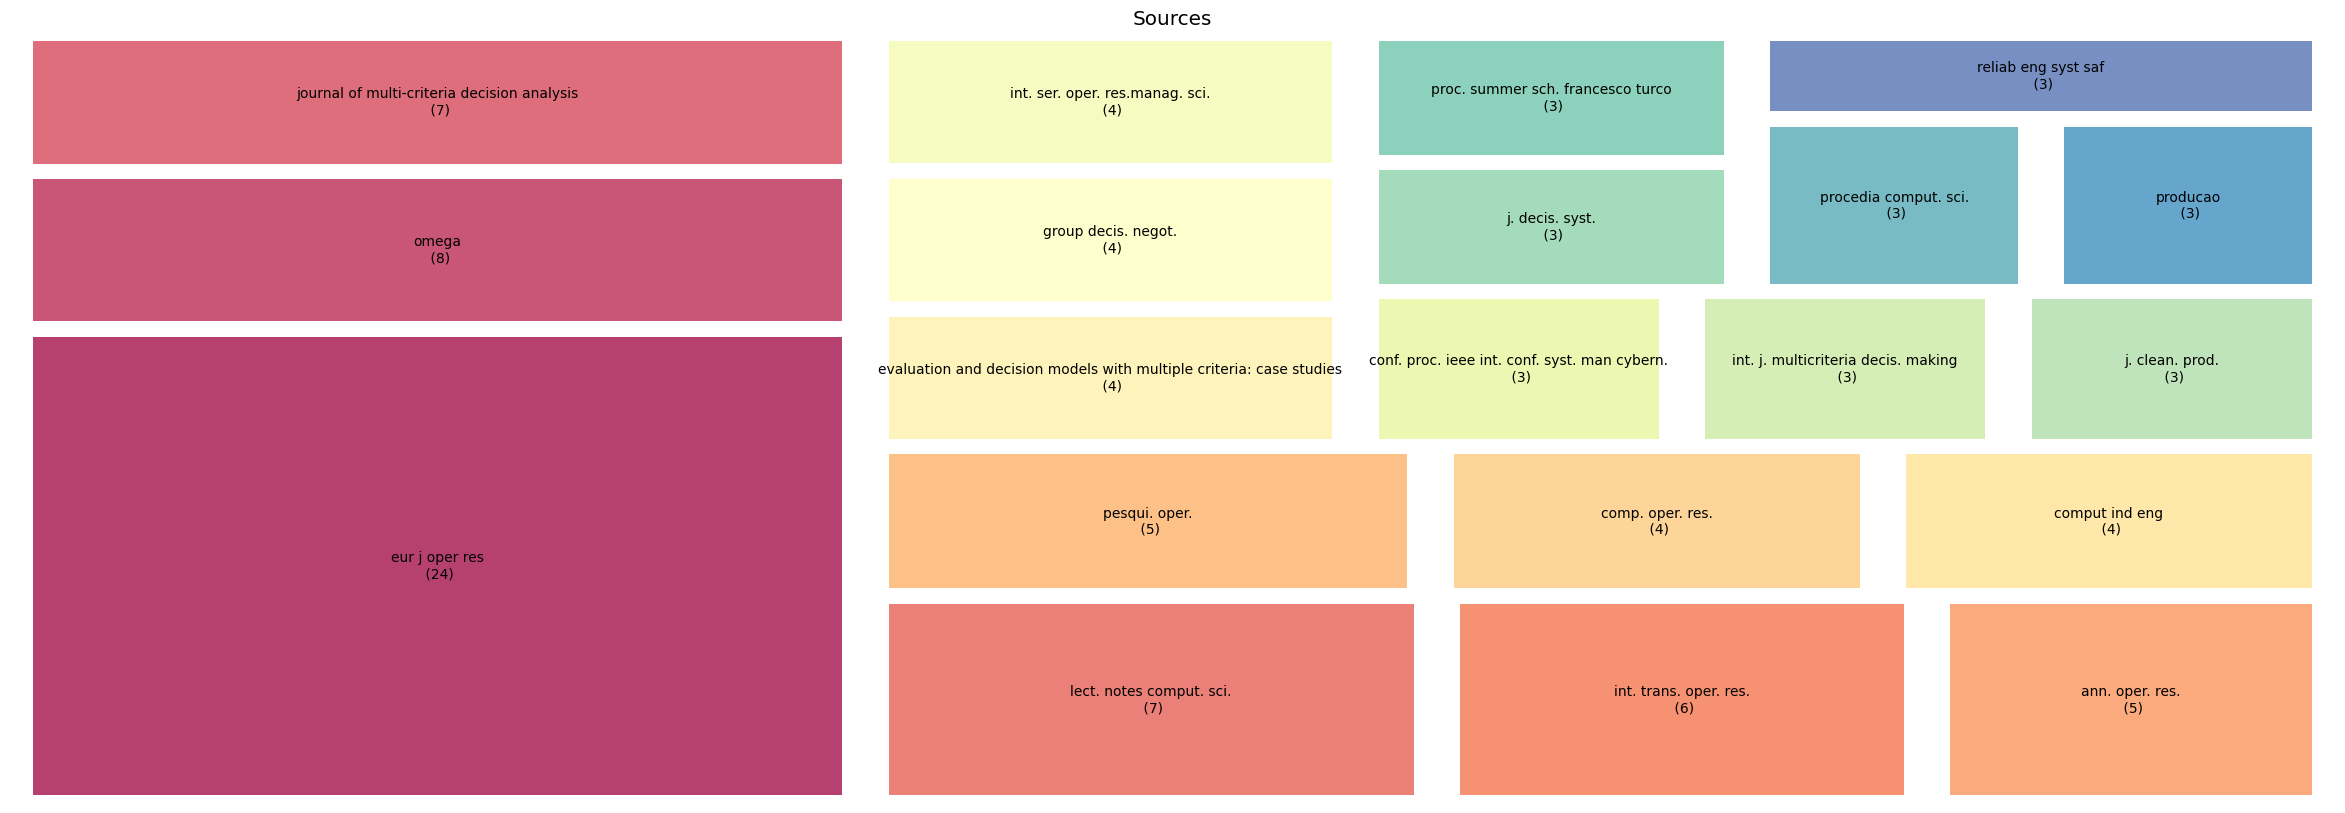

In [36]:
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10)

In [37]:
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [38]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_ap

1998  1999  2000  2001  2002  2003  2004  2006  2007  2008  \
mousseau, v.       1.0   0.0   1.0   1.0   2.0   2.0   1.0   1.0   1.0   0.0   
figueira, j.r.     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
dias, l.c.         0.0   1.0   1.0   0.0   0.0   1.0   0.0   1.0   1.0   2.0   
antunes, c.h.      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
costa, h.g.        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
roy, b.            0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   
de almeida, a.t.   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
pirlot, m.         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
certa, a.          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
unknow             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
trojan, f.         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
oliveira, e.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
carpitella, s.     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
cailloux, o.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
navarro, j.        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
kadziński, m.      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
costa, a.s.        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
bouyssou, d.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0   
zopounidis, c.     0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
tervonen, t.       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   

                  ...  2013  2014  2015  2016  2017  2018  2019  2020  2021  \
mousseau, v.      ...   1.0   1.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   
figueira, j.r.    ...   0.0   1.0   0.0   0.0   2.0   1.0   3.0   3.0   3.0   
dias, l.c.        ...   1.0   3.0   2.0   0.0   0.0   2.0   1.0   0.0   0.0   
antunes, c.h.     ...   3.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   
costa, h.g.       ...   0.0   1.0   2.0   0.0   0.0   1.0   1.0   1.0   1.0   
roy, b.           ...   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
de almeida, a.t.  ...   0.0   0.0   0.0   2.0   0.0   0.0   0.0   1.0   1.0   
pirlot, m.        ...   0.0   1.0   2.0   0.0   1.0   0.0   1.0   0.0   1.0   
certa, a.         ...   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   4.0   
unknow            ...   1.0   0.0   2.0   0.0   1.0   1.0   0.0   0.0   0.0   
trojan, f.        ...   0.0   0.0   0.0   0.0   0.0   1.0   2.0   1.0   1.0   
oliveira, e.      ...   3.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
carpitella, s.    ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   5.0   
cailloux, o.      ...   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
navarro, j.       ...   0.0   0.0   0.0   0.0   1.0   1.0   2.0   1.0   0.0   
kadziński, m.     ...   0.0   0.0   1.0   0.0   1.0   2.0   0.0   0.0   1.0   
costa, a.s.       ...   0.0   0.0   0.0   0.0   1.0   1.0   2.0   0.0   1.0   
bouyssou, d.      ...   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   1.0   
zopounidis, c.    ...   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
tervonen, t.      ...   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

                  2022  
mousseau, v.       0.0  
figueira, j.r.     1.0  
dias, l.c.         0.0  
antunes, c.h.      0.0  
costa, h.g.        0.0  
roy, b.            1.0  
de almeida, a.t.   0.0  
pirlot, m.         0.0  
certa, a.          0.0  
unknow             0.0  
trojan, f.         0.0  
oliveira, e.       0.0  
carpitella, s.     0.0  
cailloux, o.       0.0  
navarro, j.        0.0  
kadziński, m.      0.0  
costa, a.s.        0.0  
bouyssou, d.       0.0  
zopounidis, c.     0.0  
tervonen, t.       0.0  

[20 rows x 24 columns]

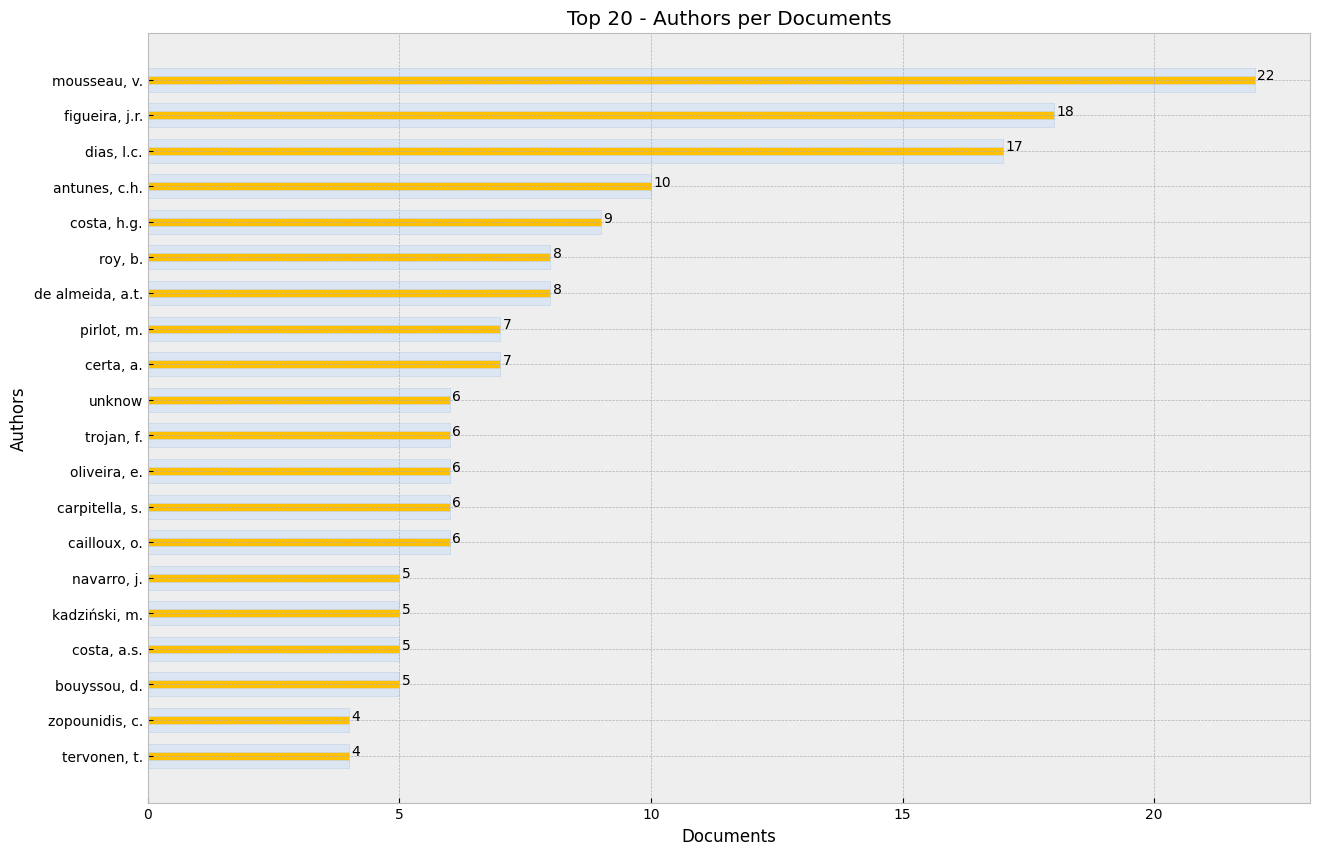

In [39]:
bibfile.plot_bars(statistic = 'apd', topn = 20, size_x = 15, size_y = 10)

In [40]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_bp

Documents  Authors
0       mousseau, v.       22
1     figueira, j.r.       18
2         dias, l.c.       17
3      antunes, c.h.       10
4        costa, h.g.        9
5            roy, b.        8
6   de almeida, a.t.        8
7         pirlot, m.        7
8          certa, a.        7
9             unknow        6
10        trojan, f.        6
11      oliveira, e.        6
12    carpitella, s.        6
13      cailloux, o.        6
14       navarro, j.        5
15     kadziński, m.        5
16       costa, a.s.        5
17      bouyssou, d.        5
18    zopounidis, c.        4
19      tervonen, t.        4

## 网络可视化

In [41]:
bibfile.network_adj_dir(view = 'notebook', min_count = 7, node_labels = True, local_nodes = False)

In [42]:
# View Table
data_nad = bibfile.ask_gpt_nad
data_nad

Paper Cited Reference
0       0          r_6826
1       5          r_5690
2       5          r_5853
3       8          r_5690
4       8          r_6641
..    ...             ...
97    252          r_5606
98    252          r_6824
99    255          r_6824
100   256          r_6134
101   257          r_6641

[102 rows x 2 columns]

In [43]:
bibfile.find_nodes_dir(view = 'notebook', article_ids = ['44', '235'], ref_ids = [])

In [45]:
bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = ['r_5606'])

In [46]:
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

In [47]:
# View Table
data_hist = bibfile.ask_gpt_hist
data_hist

Paper ID (Year) References (Year)
0          1 (2022)         51 (2019)
1          1 (2022)         59 (2019)
2          3 (2021)          8 (2021)
3          3 (2021)         45 (2019)
4          3 (2021)          7 (2021)
..              ...               ...
142      220 (2009)        250 (2002)
143      223 (2008)        220 (2009)
145      231 (2007)        246 (2003)
146      237 (2006)        249 (2002)
148      237 (2006)        242 (2004)

[145 rows x 2 columns]

In [48]:
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = ['24'], forward = [])

In [49]:
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = ['97'])

In [50]:
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

In [51]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_adj

Node 1 (Author) Node 2 (Author)  Node 1 Cluster  Node 2 Cluster
0           ID: a_7        ID: a_80             3.0             3.0
1          ID: a_14       ID: a_181             2.0             2.0
2          ID: a_16       ID: a_182             0.0             0.0
3          ID: a_18       ID: a_152             2.0             2.0
4          ID: a_22       ID: a_403             0.0             0.0
..              ...             ...             ...             ...
125       ID: a_367       ID: a_394             1.0             1.0
126       ID: a_375       ID: a_485             2.0             2.0
127       ID: a_403       ID: a_470             0.0             0.0
128       ID: a_404       ID: a_449             0.0             0.0
129       ID: a_449       ID: a_471             0.0             0.0

[130 rows x 4 columns]

In [52]:
bibfile.find_nodes(node_ids = [], node_name = ['figueira, j.r.'], node_only = False)

In [53]:
bibfile.find_nodes(node_ids = [], node_name = ['figueira, j.r.'], node_only = True)

In [54]:
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [55]:
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 1, cut_cocit = 5)

In [56]:
# Check Similarity Values
bibfile.sim_table

Pair Node  Sim(cocit)
0     (8,121)         5.0
1     (8,125)         5.0
2    (10,185)         5.0
3     (12,27)         5.0
4     (43,79)        12.0
5    (47,122)         5.0
6    (49,123)         9.0
7     (78,91)         7.0
8   (104,139)         6.0
9   (122,125)         6.0
10  (122,230)         5.0
11  (129,130)         6.0
12  (165,167)         5.0
13  (172,178)        12.0
14  (230,231)        22.0
15  (242,245)         5.0

## 国家合作网络

In [57]:
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [58]:
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = ['France'])

In [59]:
# View Table
data_map = bibfile.ask_gpt_map
data_map

Country 1       Country 2
0         Chile          Brazil
1          Iran  United Kingdom
2       Belgium    Burkina Faso
3       Belgium     Netherlands
4       Belgium          France
..          ...             ...
87  Switzerland          France
88      Germany           Italy
89      Germany        Portugal
90      Germany          France
91      Austria        Slovenia

[92 rows x 2 columns]

In [60]:
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Mexico'])

## NLP

In [61]:
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

In [62]:
emb

array([[ 0.01732533,  0.01483713, -0.07609227, ...,  0.03527189,
         0.01298358,  0.10293075],
       [-0.01841865, -0.05547311,  0.0076943 , ...,  0.0083402 ,
         0.01913655,  0.08776967],
       [-0.00182596, -0.00381899, -0.04301083, ...,  0.01539893,
        -0.04008274, -0.0306939 ],
       ...,
       [ 0.03384543, -0.05365641,  0.00420131, ..., -0.04600778,
        -0.00012457,  0.05198557],
       [-0.00717988, -0.02232209, -0.02379085, ..., -0.00799747,
        -0.01107699,  0.07819378],
       [ 0.05315314,  0.02755752, -0.01822942, ...,  0.00675462,
        -0.02459758,  0.075877  ]], dtype=float32)

如果运行提示：TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败
需要接入VPN

In [63]:
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                                 Name  \
0     -1    106     -1_decision_tri_criteria_electre   
1      0     53         0_electre_method_tri_sorting   
2      1     33     1_water_decision_system_criteria   
3      2     24  2_energy_vehicles_criteria_decision   
4      3     21   3_business_processes_model_process   
5      4     13      4_risk_risks_pipeline_suppliers   
6      5     11     5_mcda_decision_methods_software   

                                      Representation  \
0  [decision, tri, criteria, electre, method, bas...   
1  [electre, method, tri, sorting, categories, al...   
2  [water, decision, system, criteria, gis, elect...   
3  [energy, vehicles, criteria, decision, public,...   
4  [business, processes, model, process, decision...   
5  [risk, risks, pipeline, suppliers, management,...   
6  [mcda, decision, methods, software, conflict, ...   

                                 Representative_Docs  
0  [learning environments store huge amounts da

In [64]:
# Each document Topic
topics_embeddings = bibfile.topics

In [65]:
# Each document Probability to belong a Topic
probss_embeddings = bibfile.probs

In [66]:
bibfile.graph_topics_distribution(view = 'notebook')

In [67]:
bibfile.graph_topics(view='notebook')

In [68]:
bibfile.graph_topics_projection(view='notebook')

In [69]:
bibfile.graph_topics_heatmap(view = 'notebook')

In [70]:
# NLP
bibfile.topics_representatives()

Topic           Docs
0   -1.0               
1    0.0   260; 252; 12
2    1.0   141; 10; 185
3    2.0      9; 71; 28
4    3.0    18; 34; 117
5    4.0     112; 36; 2
6    5.0  142; 155; 188

In [71]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
    print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  2 Correlation:  0.167
Topic:  0 Correlation:  0.164
Topic:  -1 Correlation:  0.143
Topic:  5 Correlation:  0.102
Topic:  3 Correlation:  0.101
Topic:  1 Correlation:  0.094
Topic:  4 Correlation:  0.073


In [72]:
# NLP
bibfile.topic_model.save('my_topic_model')
#loaded_topic_model = BERTopic.load('my_topic_model')

In [73]:
abs_summary = bibfile.summarize_abst_peg(article_ids = [218, 28, 212], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [74]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

The present study proposes a multi-criteria decision aiding model, which includes the ELECTRE TRI-nC method, for supporting the public decision
process of sorting alternative energy retrofitting actions into various categories, each of them expresses different levels of overall performance.
The present study proposes a Multiple Criteria Decision Aiding model, which includes the ELECTRE TRI-nC method, for supporting the public decision
process of sorting alternative energy retrofitting actions into various categories, each of them expresses different levels of overall performance.


In [75]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [218, 28, 212])


Total Number of Valid Abstracts:  3



In [76]:
ext_summary = bibfile.summarize_ext_bert(article_ids = [218, 28, 212])


Total Number of Valid Abstracts:  3



In [77]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

The challenge of promoting sustainable cities and reaching the objectives developed by the European Green Deal includes the renovation of the building
sector, as it is responsible for 40% of energy consumption in Europe. The present study proposes a Multiple Criteria Decision Aiding model, which
includes the ELECTRE TRI-nC method, for supporting the public decision process of sorting alternative energy retrofitting actions into various
categories, each of them expresses different levels of overall performance. © 2020 Elsevier Ltd This paper performs an assessment of 41 agricultural
biogas plants located in Austria to determine their relative performance in terms of economic, environmental, and social criteria and corresponding
indicators. Under the Clean Development Mechanism (CDM), sustainable development is considered a country context-specific aspect which differs across
countries.


In [78]:
import keyring
api_key = keyring.get_password('gpt-4','api-key') 

abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [218, 28, 212], join_articles = True, api_key = api_key, query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

Document ID28 Number of Characters: 1364
Document ID212 Number of Characters: 1087
Document ID218 Number of Characters: 1078

Total Number of Valid Abstracts:  3



In [84]:
abs_summary_chat

"Promoting sustainable cities and achieving the European Green Deal's objectives require renovation of the building sector, which accounts for 40% of Europe's energy consumption. A study proposes a Multiple Criteria Decision Aiding model, including the ELECTRE TRI-nC method, to support the public decision-making process of categorizing alternative energy retrofitting actions based on performance. The model hints that opaque envelope insulation actions are prioritized over lighting system upgrades. Meanwhile, another paper assesses 41 Austrian agricultural biogas plants on economic, environmental, and social criteria using Data Envelopment Analysis (DEA) and the IRIS/ELECTRE TRI method. The paper advocates for complementary use of DEA and IRIS, due to the utility of the latter in incorporating stakeholders' preferences. Lastly, a research study aims to align the Clean Development Mechanism (CDM) better with national sustainable development priorities via identification of sustainable en

In [79]:
#获取全部数据
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 261 Documents Remains

Article = 179
Article in Press = 1
Book Chapter = 12
Conference Paper = 64
Conference Review = 3
Review = 2


In [80]:
#获取2015-2020年文献数据
bibfile.filter_bib(documents = [], doc_type = [], year_str = 2015, year_end = 2020, sources = [], core = -1, country = [], language = [], abstract = False)

A Total of 111 Documents Remains

Article = 72
Article in Press = 1
Book Chapter = 9
Conference Paper = 27
Conference Review = 2


In [81]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')

In [82]:
bibfile

In [83]:
print(dir(bibfile))

['H', 'Xn', 'Xv', 'Yn', 'Yv', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_pbx_probe__adjacency_matrix_aut', '_pbx_probe__adjacency_matrix_ctr', '_pbx_probe__adjacency_matrix_inst', '_pbx_probe__adjacency_matrix_kwa', '_pbx_probe__adjacency_matrix_kwp', '_pbx_probe__adjacency_matrix_ref', '_pbx_probe__get_citations', '_pbx_probe__get_collaboration_year', '_pbx_probe__get_countries', '_pbx_probe__get_counts', '_pbx_probe__get_counts_year', '_pbx_probe__get_institutions', '_pbx_probe__get_past_citations_year', '_pbx_probe__get_ref_year', '_pbx_probe__get_str', '_pbx_probe__h_index', '_pbx_probe__hex_rgba', '_pbx_probe__id_author', '_pbx_probe__id_country', '_pbx_probe__id_document', '_pbx_pro